# <font color = 'red'> Importing libraries </font>
<hr style='border: 2px solid red;'>

In [1]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [2]:
import pandas as pd

In [4]:
import numpy as np

In [37]:
import seaborn as sns

### Optional Libraries 

https://docs.python.org/3/library/warnings.html

## <font color ='red'> The dataSet and the Project </font>
<hr style='border: 2px solid red;'>

**source** : https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

In [5]:
dados = pd.read_csv('./Dados/Consumo_cerveja.csv', sep = ';')

In [6]:
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


### Checking dataSet size: 

In [7]:
dados.shape[0] 

365

In [12]:
dados.columns

Index(['data', 'temp_media', 'temp_min', 'temp_max', 'chuva', 'fds',
       'consumo'],
      dtype='object')

### Translation data

In [23]:
rename = {
    'data':'date',
    'temp_media' : 'temp_avg',
    'chuva': 'rain',
    'fds' : 'weekend',
    'consumo' : 'consump'}

In [24]:
data = dados.rename(columns = rename)

In [25]:
data.head()

,date,temp_avg,temp_min,temp_max,rain,weekend,consump
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


##### **temp_avg, temp_min, temp_max in Celsius**
##### **rain in mm**
##### **consump in Liters**

## <font color ='red'> Preliminary Analysis </font>
<hr style='border: 2px solid red;'>

#### Using describe()

In [31]:
data.describe().round(2)

,temp_avg,temp_min,temp_max,rain,weekend,consump
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


#### loking for NaN

In [30]:
data.isna().sum()

date        0
temp_avg    0
temp_min    0
temp_max    0
rain        0
weekend     0
consump     0
dtype: int64

#### Correlation matrix: 

In [32]:
data.corr().round(2)

,temp_avg,temp_min,temp_max,rain,weekend,consump
temp_avg,1.00,0.86,0.92,0.02,-0.05,0.57
temp_min,0.86,1.00,0.67,0.10,-0.06,0.39
temp_max,0.92,0.67,1.00,-0.05,-0.04,0.64
rain,0.02,0.10,-0.05,1.00,0.00,-0.19
weekend,-0.05,-0.06,-0.04,0.00,1.00,0.51
consump,0.57,0.39,0.64,-0.19,0.51,1.00


##### The **correlation coefficient** is a measure of linear association between two variables and is between -1 and 1,
##### with -1 being a negative association and +1 a positive association

## <font color ='red'> Behavior of the dependent variable (Y) </font>
<hr style='border: 2px solid red;'>

### Graphic analysis

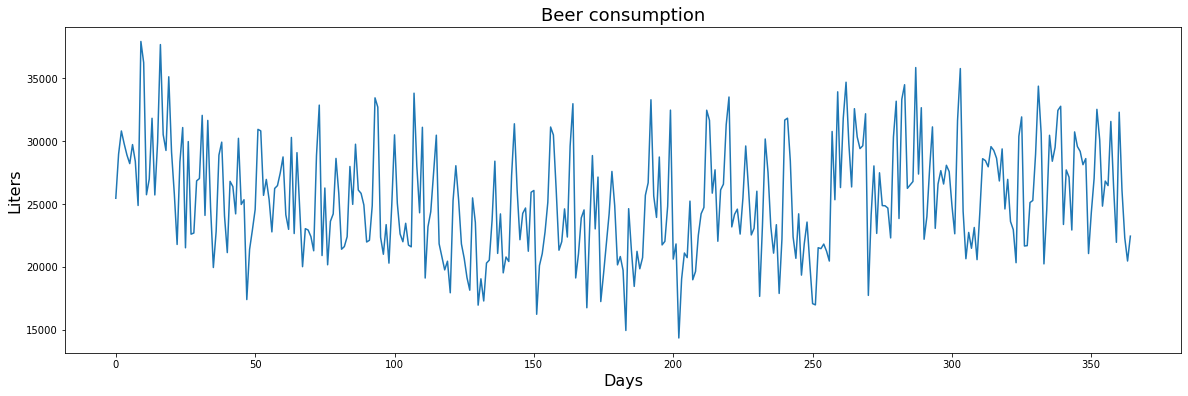

In [36]:
fig, ax = plt.subplots(figsize = (20,6))
ax.set_title('Beer consumption', fontsize = 18)
ax.set_xlabel('Days', fontsize = 16)
ax.set_ylabel('Liters', fontsize = 16)
ax = data.consump.plot()

### Box Plot

Text(0.5, 1.0, 'Beer Consumption - BoxPlot')

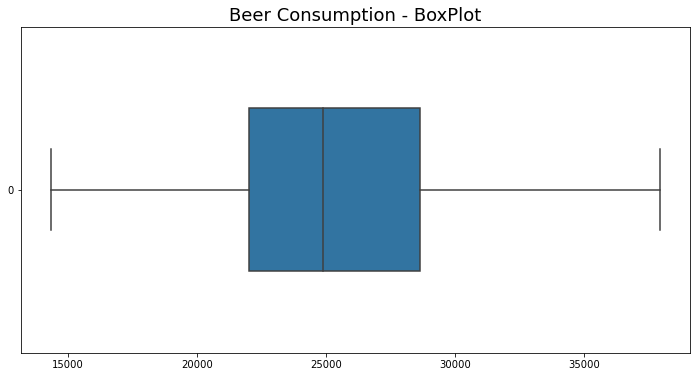

In [46]:
ax = sns.boxplot(data = data['consump'], orient = 'h', width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Beer Consumption - BoxPlot', fontsize = 18)


### Box Plot with Two variables

Text(0, 0.5, 'Consumption')

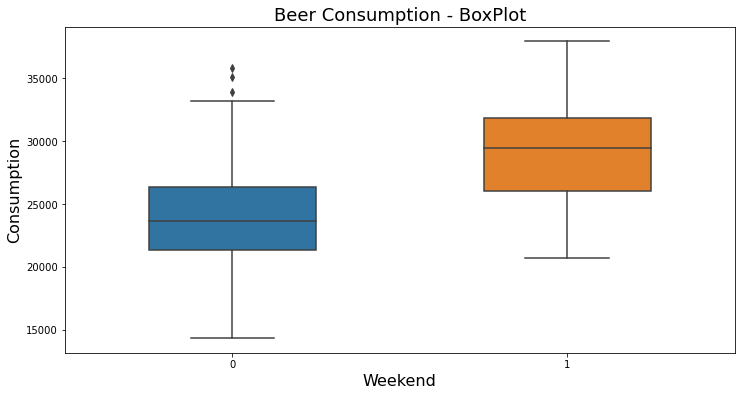

In [55]:
ax = sns.boxplot(y = 'consump', x = 'weekend', data = data, orient = 'v', width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Beer Consumption - BoxPlot', fontsize = 18)
ax.set_xlabel('Weekend', fontsize = 16)
ax.set_ylabel('Consumption', fontsize = 16)



### optional: Changing the colors seaborn

**API**

https://seaborn.pydata.org/api_html#palette-api

**Tutorial**

https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

Text(0, 0.5, 'Consumption')

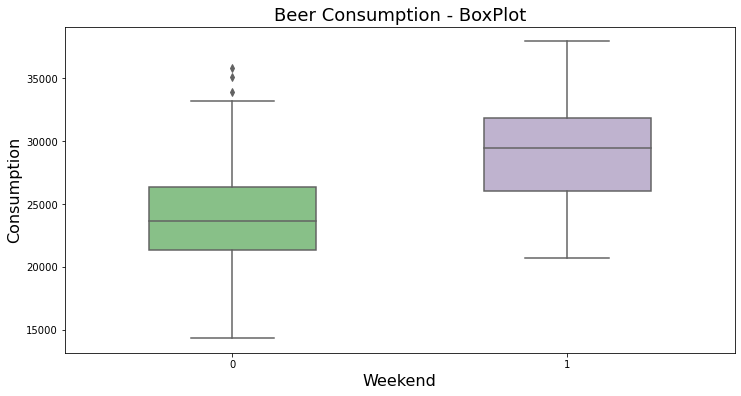

In [60]:
sns.set_palette('Accent') 
ax = sns.boxplot(y = 'consump', x = 'weekend', data = data, orient = 'v', width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Beer Consumption - BoxPlot', fontsize = 18)
ax.set_xlabel('Weekend', fontsize = 16)
ax.set_ylabel('Consumption', fontsize = 16)


## <font color ='red'> Frequency Distribution </font>
<hr style='border: 2px solid red;'>

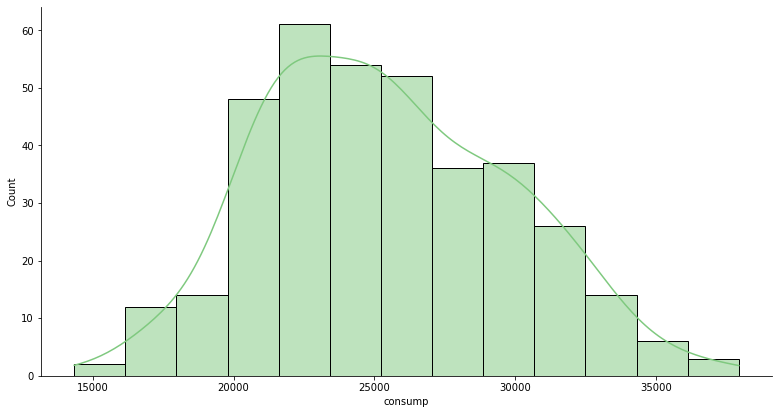

In [78]:
sns.set_palette('Accent')
ax = sns.displot(data.consump, kde = True)
ax.figure.set_size_inches(12,6)



## <font color ='red'> Dependent variable vs Explanatory variable (pairplot) </font>
<hr style='border: 2px solid red;'>

### Ploting the relation between pairs of variables of a dataset

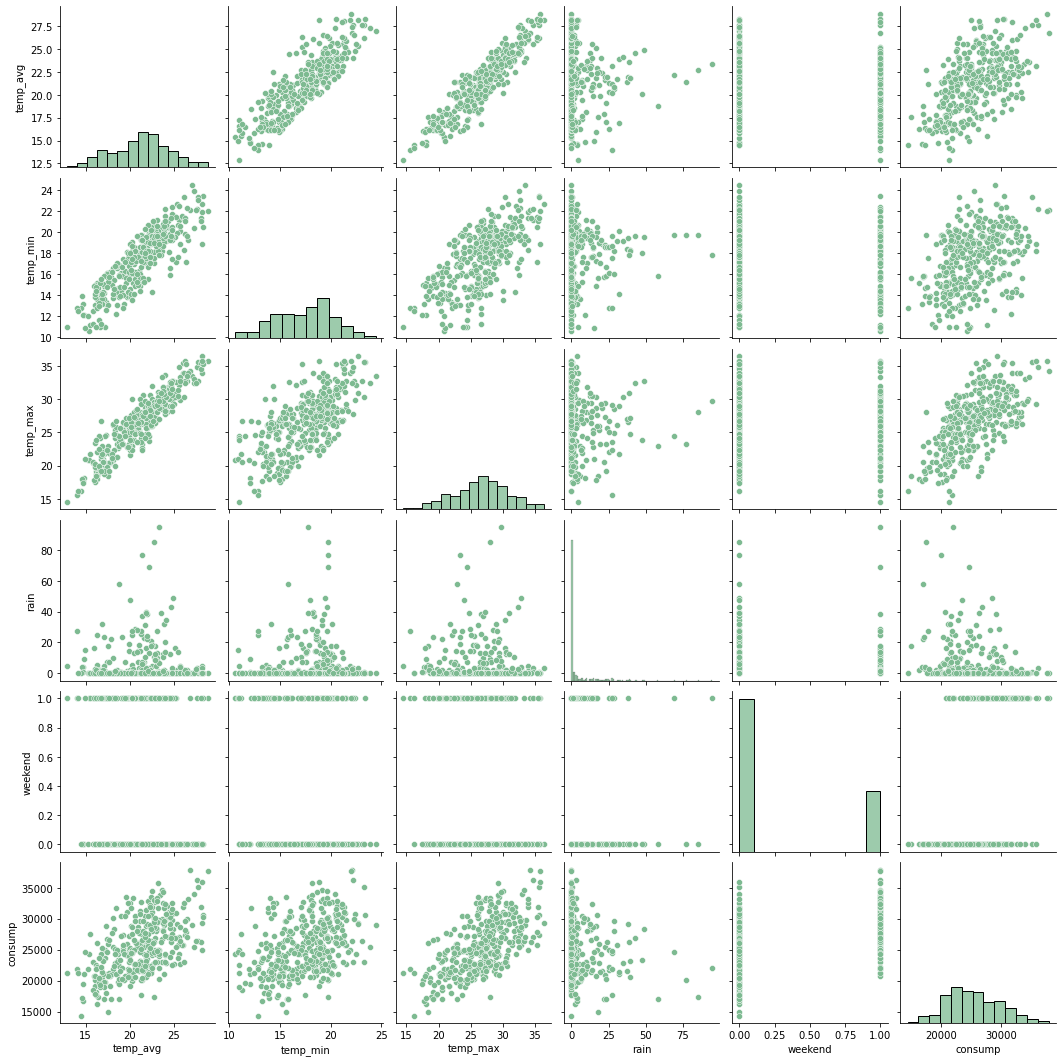

In [86]:
sns.color_palette("viridis", as_cmap = True)
sns.pairplot(data)

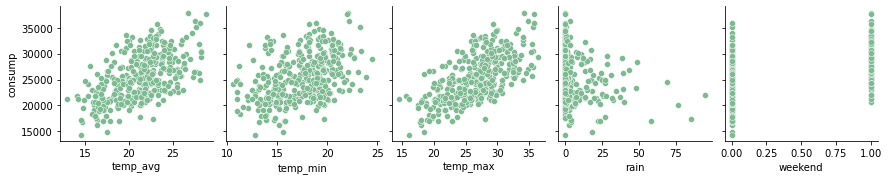

In [87]:
ax = sns.pairplot(data, y_vars = 'consump', x_vars = ['temp_avg','temp_min','temp_max','rain','weekend'] ) 

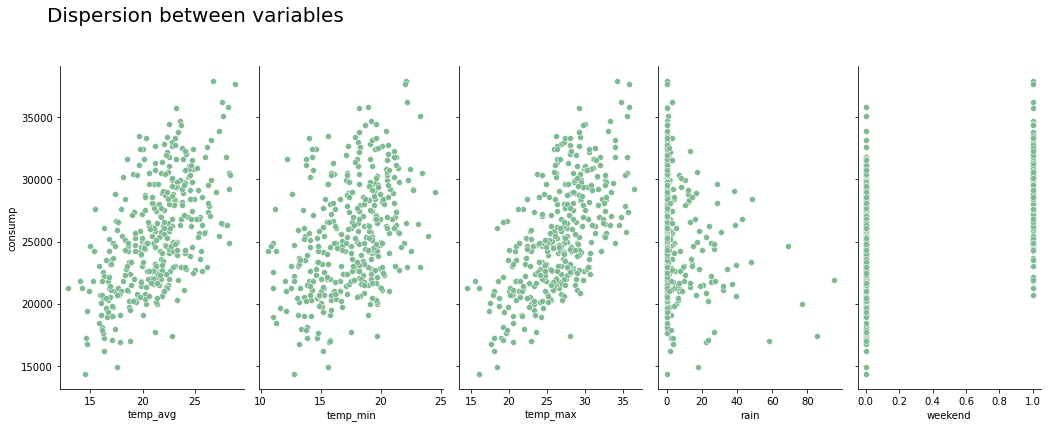

In [99]:

ax = sns.pairplot(data, y_vars = 'consump', x_vars = ['temp_avg','temp_min','temp_max','rain','weekend'] ) 
ax.fig.suptitle('Dispersion between variables', fontsize = 20, y = 1.10, x = 0.20)
ax.figure.set_size_inches(15,6)

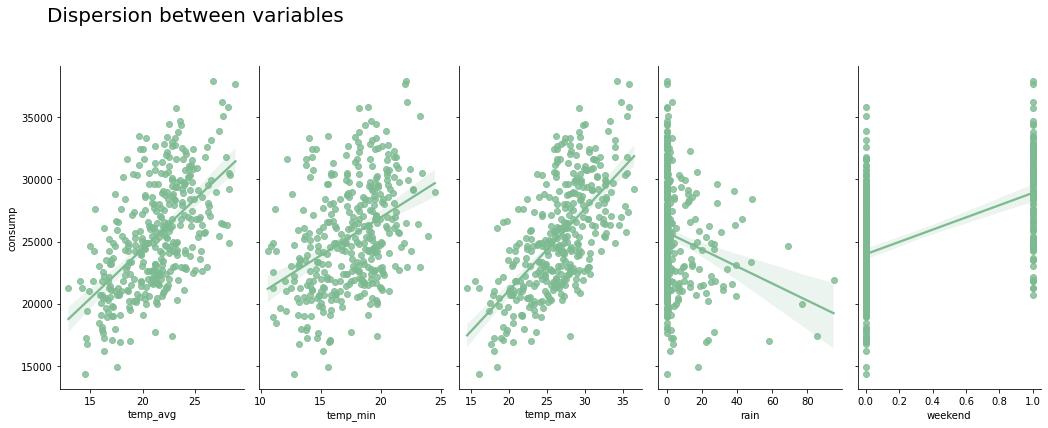

In [100]:
ax = sns.pairplot(data, y_vars = 'consump', x_vars = ['temp_avg','temp_min','temp_max','rain','weekend'], kind = 'reg' ) 
ax.fig.suptitle('Dispersion between variables', fontsize = 20, y = 1.10, x = 0.20)
ax.figure.set_size_inches(15,6)

## <font color ='red'> Dependent variable vs Explanatory variable (joinplot) </font>
<hr style='border: 2px solid red;'>

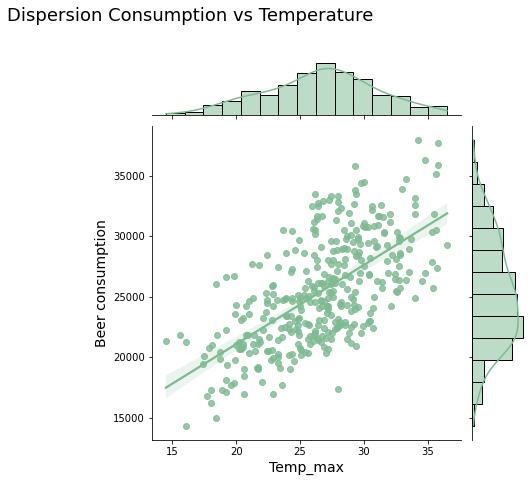

In [105]:
ax = sns.jointplot(x = 'temp_max', y = 'consump', data = data, kind = 'reg')
ax.fig.suptitle('Dispersion Consumption vs Temperature', fontsize = 18, y = 1.10, x = 0.20)
ax.set_axis_labels('Temp_max', 'Beer consumption', fontsize = 14)
ax

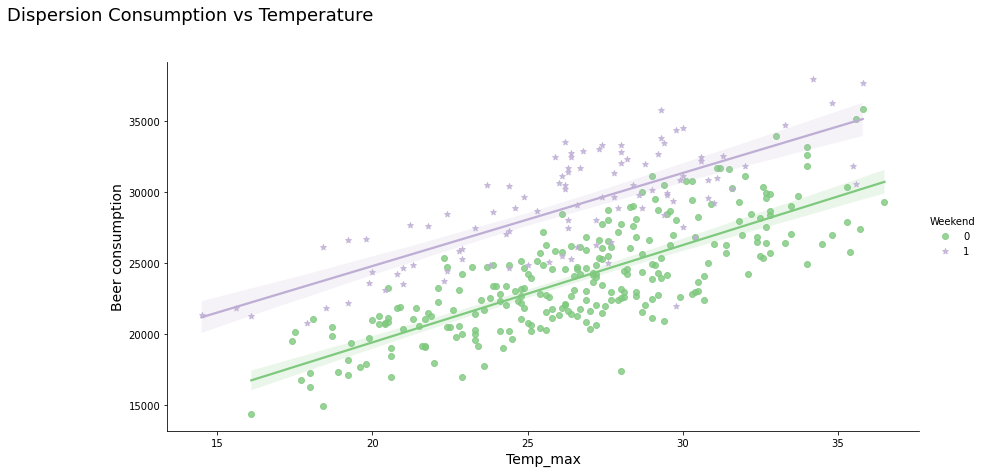

In [110]:
sns.set_palette('Accent') 
ax = sns.lmplot(x = 'temp_max', y = 'consump', data = data, hue = 'weekend', markers = ['o', '*'], legend = False)
ax.fig.suptitle('Dispersion Consumption vs Temperature', fontsize = 18, y = 1.10, x = 0.20)
ax.set_axis_labels('Temp_max', 'Beer consumption', fontsize = 14)
ax.figure.set_size_inches(13,6)
ax.add_legend(title='Weekend') 
ax

## <font color ='red'> Estimating a linear regression model for consumption </font>
<hr style='border: 2px solid red;'>

**scikit-learn**

https://scikit-learn.org/stable/

**Importing train_test_split**

In [112]:
from sklearn.model_selection import train_test_split

**Creating a series to store the consumption (y)**

In [117]:
y = data['consump']

**Creating a DataFrame to store the explanatory variables  (x)**

In [118]:
X = data[['temp_max', 'rain', 'weekend']]

**Creating a dataSet of training and test**

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [121]:
X_train.shape

(255, 3)

In [122]:
X_test.shape

(110, 3)

In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
from sklearn import metrics

#### Instancing a LinearRegression()

In [125]:
model = LinearRegression()

#### Using the fit() method of the 'model' object to estimate our linear model using the TRAIN data (y_train and X_train)

In [126]:
model.fit(X_train, y_train)

LinearRegression()

#### Obtaining the determination coefficient R2

In [127]:
print('R2 = {}'.format(model.score(X_train, y_train).round(2)))

R2 = 0.73


#### Generating predictions using TESTE(X_test) and predict()

In [146]:
y_predict = model.predict(X_test)

#### Obtaining the determination coefficient R2 for predict model

In [130]:
print('R2 = {}'.format(metrics.r2_score(y_test, y_predict).round(2)))

R2 = 0.69


## <font color ='red'> Pontual predictions </font>
<hr style='border: 2px solid red;'>

In [143]:
entry = X_test[0:2]

In [144]:
entry

,temp_max,rain,weekend
5,30.5,12.2,0
83,27.9,0.0,0


In [147]:
model.predict(entry)[0] 

26094.901775262013

#### Creating a simples simulator

In [150]:
temp_max = 24
rain = 5
weekend = 1
entry = [[temp_max, rain, weekend]]

print('{0:.2f} liters of beer'.format(model.predict(entry)[0]))


27786.74 liters of beer


#### Saving the model
<hr style='border: 1px solid black;'>

**pickle** (https://docs.python.org/3/library/pickle.html)

In [176]:
import pickle

In [177]:
output = open('consumption_model', 'wb') 

In [179]:
pickle.dump(model, output)
output.close()

temp_max = 24
rain = 50
weekend = 0
entry = [[temp_max, rain, weekend]]

print('{0:.2f} liters of beer'.format(model.predict(entry)[0]))

## <font color ='red'> Interpretation of estimated coefficient </font>
<hr style='border: 2px solid red;'>

#### Obtaining the intercept for the model

In [154]:
model.intercept_

5951.976339312456

#### Obtaining the regression coefficients

In [155]:
model.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

#### Confirming the order of variables on the DataFrame

In [156]:
X.columns

Index(['temp_max', 'rain', 'weekend'], dtype='object')

#### Creating a list with the variable names

In [158]:
index = ['Intercept', 'Temperature max', 'Rain (mm)', 'Weekend'] 

#### Creating a DataFrame to store the coefficients of the model

In [159]:
pd.DataFrame(data=np.append(model.intercept_, model.coef_), index = index, columns = ['Parameters']) 

,Parameters
Intercept,5951.976339
Temperature max,684.736759
Rain (mm),-60.782435
Weekend,5401.083339


#### Interpretation of estimated coefficients
<hr style='border: 1px solid black;'>

**Intercept** = Excluding the effects of the explanatory variables (x2=x3=x4=0), the average effect on Beer Consumption would be 5951.98 liters. That is, removing the influence of temperature, rain and weekend, the base consumption would still be **5951.98 liters**

**Temperature Max** = keeping the values ​​of x3 (rain) and x4 (weekend) constant, the addition of 1C in the maximum temperature generates an average variation in beer 
consumption of **684.74 liters**

**Rain** = Keeping the values of x2 (max temperature) and x4 (weekend) constant, the addition of 1mm of 
rain was an average variation inBeer Consumption of **-60.78 liters**

**Weekend (Y/N)** = Keeping=x2(max temperature) and x3(rain) constant, the fact that the day is a weekend or does not a
ffect the Beer Consumption in **5401.08 liters**

## <font color ='red'> Graphical analysis of model predictions </font>
<hr style='border: 2px solid red;'>

In [161]:
y_predicted_train = model.predict(X_train)

#### Scatter graphic

Text(0, 0.5, 'Beer consumption (liters) - Real')

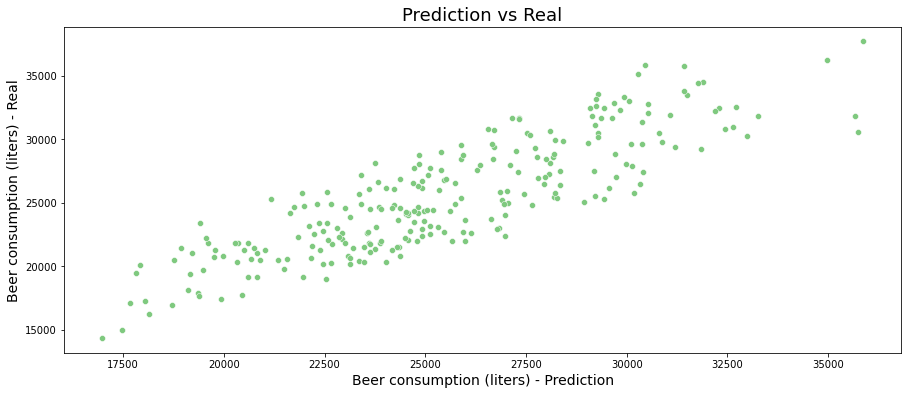

In [164]:
ax = sns.scatterplot(x=y_predicted_train, y = y_train)
ax.figure.set_size_inches(15,6)
ax.set_title('Prediction vs Real', fontsize = 18)
ax.set_xlabel('Beer consumption (liters) - Prediction', fontsize = 14)
ax.set_ylabel('Beer consumption (liters) - Real', fontsize = 14)

## <font color ='red'> Comparing models </font>
<hr style='border: 2px solid red;'>

### Estimating a new model based on temp_avg instead of temp_max

In [169]:
X2 = data[['temp_avg', 'rain', 'weekend']]

### Creating a dataSet for training and test

In [170]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.33, random_state=2811)

### Instantiating the class LinearRegression()

In [171]:
model_2 = LinearRegression()

### Using fit()

In [172]:
model_2.fit(X2_train, y2_train)

LinearRegression()

### Obtaining the R2

In [174]:
print('R2 = {}'.format(model_2.score(X2_train, y2_train).round(2)))

R2 = 0.67


## <font color ='red'>Other regression metrics </font>
<hr style='border: 2px solid red;'>